# Decision Tree Regressor

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'Number_of_Bedrooms':[2,2,4,1,3,1,4,2],'Price_of_Sale':[100000,120000,250000,80000,220000,170000,500000,75000]})
df

,Number_of_Bedrooms,Price_of_Sale
0,2,100000
1,2,120000
2,4,250000
3,1,80000
4,3,220000
5,1,170000
6,4,500000
7,2,75000


In [51]:
X=df['Number_of_Bedrooms']
y=df['Price_of_Sale'].astype(int) 

In [52]:
X

0    2
1    2
2    4
3    1
4    3
5    1
6    4
7    2
Name: Number_of_Bedrooms, dtype: int64

In [53]:
X=np.array(X).reshape(-1, 1)

In [54]:
X

array([[2],
       [2],
       [4],
       [1],
       [3],
       [1],
       [4],
       [2]], dtype=int64)

In [55]:

y


0    100000
1    120000
2    250000
3     80000
4    220000
5    170000
6    500000
7     75000
Name: Price_of_Sale, dtype: int32

In [56]:
from sklearn.tree import DecisionTreeRegressor  

In [57]:
dr=DecisionTreeRegressor()
dr.fit(X,y)

DecisionTreeRegressor()

In [60]:
y_pred = dr.predict([[4]])

In [61]:
y_pred

array([375000.])

In [64]:
dr.predict([[2]])

array([98333.33333333])

In [65]:
## using more than 1 feature

In [70]:
data=pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Decision Trees/datasets_1784_3092_input.csv',usecols=['FG', 'TG', 'SQ', 'SP', 'Q', 'RH', 'PG', 'UG', 'EV24', 'TX'])
data.head()

,FG,TG,SQ,SP,Q,RH,EV24,PG,UG,TX
0,27,228,137,82,2799,0,53,10240,57,297
1,32,240,145,87,2723,0,53,10209,52,301
2,31,237,152,91,2913,0,56,10174,47,301
3,18,248,130,78,2678,0,53,10151,55,320
4,23,240,64,39,1767,2,34,10143,69,296


In [71]:
data.shape

(4048, 10)

In [72]:
X=data.values[:,0:9]
y=data.values[:,9]

In [73]:
X


array([[   27,   228,   137, ...,    53, 10240,    57],
       [   32,   240,   145, ...,    53, 10209,    52],
       [   31,   237,   152, ...,    56, 10174,    47],
       ...,
       [   52,   172,    34, ...,    26, 10101,    78],
       [   39,   182,     9, ...,    14, 10093,    88],
       [   41,   188,    88, ...,    31, 10072,    76]], dtype=int64)

In [74]:
y

array([297, 301, 301, ..., 210, 205, 229], dtype=int64)

In [121]:
y=y/10

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 100)

In [123]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor(max_depth=8)

In [124]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [125]:
y_pred = reg.predict(X_test)

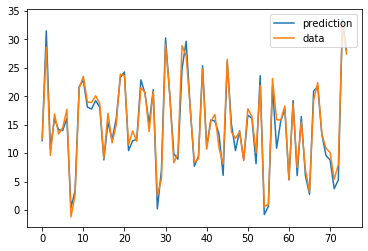

In [126]:
plt.plot(y_pred[:75], label = 'prediction')
plt.plot(y_test[:75], label = 'data')
plt.legend()
plt.show()

In [127]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, reg.predict(X_test))


0.9963660801153467

In [131]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=1000)
scores.mean()

0.9909318213519454

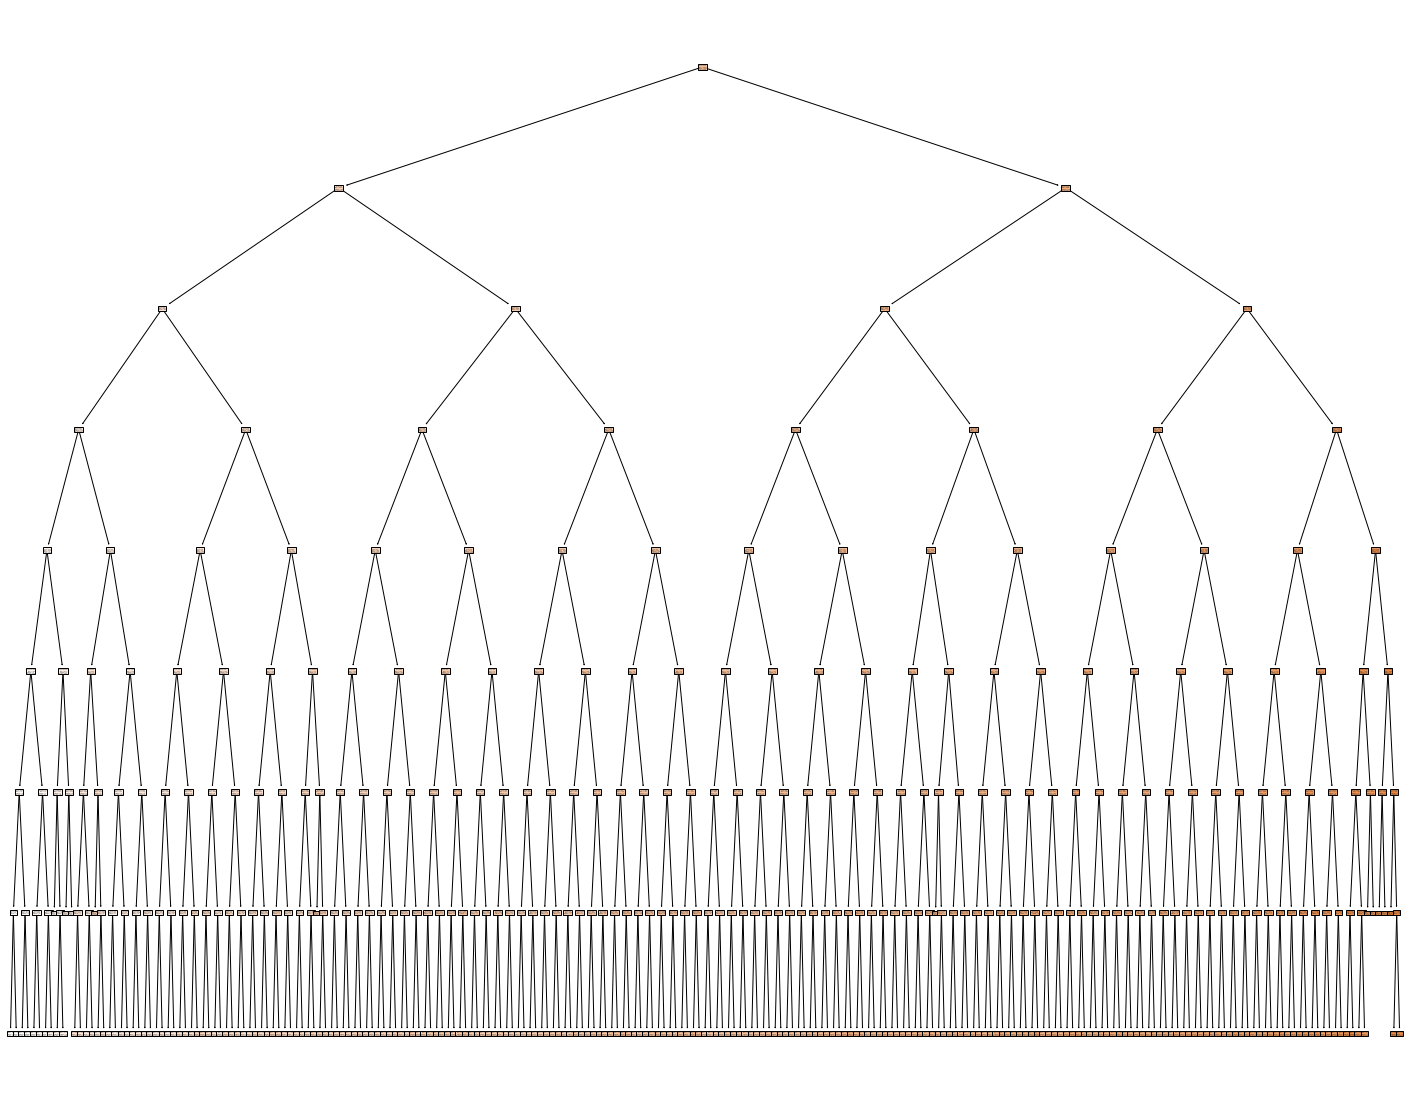

In [135]:
from sklearn.tree import  plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(reg, 
                   feature_names=['FG', 'TG', 'SQ', 'SP', 'Q', 'RH', 'PG', 'UG', 'EV24', 'TX'],
                   filled=True)